<a href="https://colab.research.google.com/github/rishi-analytics/deep-learning/blob/main/Copy_of_DL2024_assign3_RISHIKESH_KESARI__2414653.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 521153S Deep Learning assignment 3: Training CNN networks



This assignment is designed by Marko Savic.

## Outline
#### In this assignment, you will learn:
* Writing custom dataset in Pytorch with training, validation and testing data.
* Building a Convolutional Neural Network (CNN) in Pytorch.
* Training and testing your CNN in Pytorch.

#### Tasks (<span style="color:green">10 points</span>)
* **Part 1.** Writing a custom dataset based on Fashion-MNIST (<span style="color:green">4 points</span>)
    * 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
    * 1.2. Dataset checking (<span style="color:green">1 points</span>)
    * 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)<br>
* **Part 2.** Build a CNN on your own. (<span style="color:green">2 points</span>) <br>
* **Part 3.** Train and test your CNN. (<span style="color:green">4 points or more</span>)
    * 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>) <br>
    * 3.2. Train and test your network (<span style="color:green">1.5 point</span>) <br>

#### Environment
Python 3, Numpy, matplotlib, torch, torchvision

#### Dataset
* [**Fashion-MNIST**](https://github.com/zalandoresearch/fashion-mnist)
is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

You are to split the 60,000 images in the predefined training set into a new training set with 50,000 images and a validation set with 10,000 images. Fashion-MNIST is a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training, validation and testing splits.

#### Hints
* To find the place where you have to insert your solution, hit Crtl + F and search for **TODO:** . You are not supposed to modify the codes from other parts.
* Be careful with the shapes of the tensors flowing through the CNN model, making all the operations have compatible inputs and outputs.

## Part 1. Writing a custom dataset based on Fashion-MNIST (<span style="color:green">4 points</span>)

### Part 1.1. Define a Dataset class (<span style="color:green">2 points</span>)
Here we define a custom dataset by extending the [Dataset](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) class.

In [ ]:
!pip install onedrivedownloader

In [ ]:
from onedrivedownloader import download
import os
link = 'https://unioulu-my.sharepoint.com/:u:/g/personal/msavic21_univ_yo_oulu_fi/EY1hdgh6AvZKvqYn3WFp5XMB1EDaL0IYST9PIPdBB8f0Eg?e=NSxK4b'

if not os.path.exists('./data/fashion_mnist_npy'):
    print('Downloading dataset')
    download(link, filename="./fashion_mnist_npy_hw3", unzip=True, unzip_path='./data/fashion_mnist_npy')

In [ ]:
# import necessary packages
import os
import torch
import requests, zipfile, sys
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms


# fashion_MNIST dataset
data_dir='./data/fashion_mnist_npy/'
train_data = np.load(os.path.join(data_dir, 'train_data.npy'))
test_data = np.load(os.path.join(data_dir, 'test_data.npy'))
train_label = np.load(os.path.join(data_dir, 'train_labels.npy'))
test_label = np.load(os.path.join(data_dir, 'test_labels.npy'))

print(len(train_label))
# spliting the training data to a new training data and validation data
class_indices = [[] for i in range(10)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# taking the first 1000 indices of indices_all
indices = indices_all[:1000]
# taking the rest of the indices of indices_all
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []
for i in range(10):
    # build indices for validation set
    valid_indices.extend(np.array(class_indices[i])[indices])
    # TODO: build indices for training set (0.25 points)
    # your code here

# write the custom dataset based on the dataset----->
# write the custom dataset based on the dataset
class FashionMnist(Dataset):
    """Fashion Mnist dataset"""

    def __init__(self, phase='train', transform=None):

        # Split the predefined training data into new training and validation sets
        if phase == 'train':
            # Take the indices for the training set (those not part of validation)
            self.data = train_data[train_indices]
            self.labels = train_label[train_indices]

        elif phase == 'valid':
            # Take the indices for the validation set
            self.data = train_data[valid_indices]
            self.labels = train_label[valid_indices]

        elif phase == 'test':
            # For test data
            self.data = test_data
            self.labels = test_label

        else:
            raise ValueError("Invalid phase. Choose from 'train', 'valid', or 'test'")

        self.transform = transform
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Get image and label according to the index
        img = self.data[index]
        label = self.labels[index]

        # Convert to a PIL Image
        img = Image.fromarray(img, mode='L')

        # Apply transformation if any
        if self.transform is not None:
            img = self.transform(img)

        return img, label


60000


In [ ]:
# Spliing the training data into new training data and validation data
class_indices = [[] for i in range(10)]
for i, v in enumerate(train_label):
    class_indices[v].append(i)

indices_all = np.random.permutation(len(class_indices[0]))
# Taking the first 1000 indices for validation
indices = indices_all[:1000]
# Taking the remaining indices for training
indices_rest = indices_all[1000:]

valid_indices = []
train_indices = []

for i in range(10):
    # Building indices for validation set
    valid_indices.extend(np.array(class_indices[i])[indices])
    # Building indices for training set
    train_indices.extend(np.array(class_indices[i])[indices_rest])

# setting up indices are set up correctly
print(f"Number of training samples: {len(train_indices)}")
print(f"Number of validation samples: {len(valid_indices)}")

# Custom dataset class for Fashion MNIST
class FashionMnist(Dataset):
    """Fashion Mnist dataset"""

    def __init__(self, phase='train', transform=None):

        if phase == 'train':
            # Taking the indices for the training set
            self.data = train_data[train_indices]
            self.labels = train_label[train_indices]

        elif phase == 'valid':
            # Taking the indices for the validation set
            self.data = train_data[valid_indices]
            self.labels = train_label[valid_indices]

        elif phase == 'test':
            # For test data
            self.data = test_data
            self.labels = test_label

        else:
            raise ValueError("Invalid phase. Choose from 'train', 'valid', or 'test'")

        self.transform = transform
        self.label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        # Geting image and labeling according to the index
        img = self.data[index]
        label = self.labels[index]

        # Converting to a PIL Image
        img = Image.fromarray(img, mode='L')

        # Applying transformation if any
        if self.transform is not None:
            img = self.transform(img)

        return img, label

Number of training samples: 50000
Number of validation samples: 10000


In [ ]:
# checking if the dataset is properly loaded:
train_set = FashionMnist(phase='train')
valid_set = FashionMnist(phase='valid')
test_set = FashionMnist(phase='test')

print(f"Number of training samples: {len(train_set)}")
print(f"Number of validation samples: {len(valid_set)}")
print(f"Number of test samples: {len(test_set)}")

Number of training samples: 50000
Number of validation samples: 10000
Number of test samples: 10000


### Part 1.2. Dataset checking (<span style="color:green">1.5 points</span>)
First, randomly show some images in training, validation and testing data and check if the images have correct labels.<br>
Secondly, check the number of images for each class, to make sure the dataset created correctly.

In [ ]:
# Checking the lengths of the dataset objects
print(f"Number of samples in train_set: {len(train_set)}")
print(f"Number of samples in valid_set: {len(valid_set)}")
print(f"Number of samples in test_set: {len(test_set)}")

# Checking the shape of data arrays for quick confirmation
print(f"Shape of train_data: {train_data.shape}")
print(f"Shape of train_labels: {train_label.shape}")
print(f"Shape of test_data: {test_data.shape}")
print(f"Shape of test_labels: {test_label.shape}")


Number of samples in train_set: 0
Number of samples in valid_set: 10000
Number of samples in test_set: 10000
Shape of train_data: (60000, 28, 28)
Shape of train_labels: (60000,)
Shape of test_data: (10000, 28, 28)
Shape of test_labels: (10000,)


In [ ]:
# Checking if the dataset is loaded correctly
train_set = FashionMnist(phase='train', transform=None)
valid_set = FashionMnist(phase='valid', transform=None)
test_set = FashionMnist(phase='test', transform=None)

# Checking the length of train_set
print(f"Number of samples in train_set: {len(train_set)}")

if len(train_set) > 0:
    # Display random samples from the training set
    num_to_show = 5
    idx = np.random.choice(range(len(train_set)), num_to_show, replace=False)  # Randomly pick 5 images

    fig = plt.figure(figsize=(16, 8))

    for i in range(len(idx)):
        image, label = train_set[idx[i]]  # Get the image and its label
        label_name = train_set.label_names[label]  # Get the label name from label index

        ax = plt.subplot(1, num_to_show, i + 1)
        plt.tight_layout()
        ax.set_title('class #{}'.format(label_name))  # Display the label name
        ax.axis('off')
        plt.imshow(np.asarray(image))  # Show the image

    plt.show()

    # Print the total number of images in the training set
    print('Total number of training set images: {}'.format(len(train_set)))

    # Print the number of images for each class in the training set
    for i in range(10):
        class_count = np.sum(train_set.labels == i)  # Count images for each class
        print('Number of images for class {}: {}'.format(train_set.label_names[i], class_count))
else:
    print("Error: train_set is empty. Please check your data loading process.")

Number of samples in train_set: 0
Error: train_set is empty. Please check your data loading process.


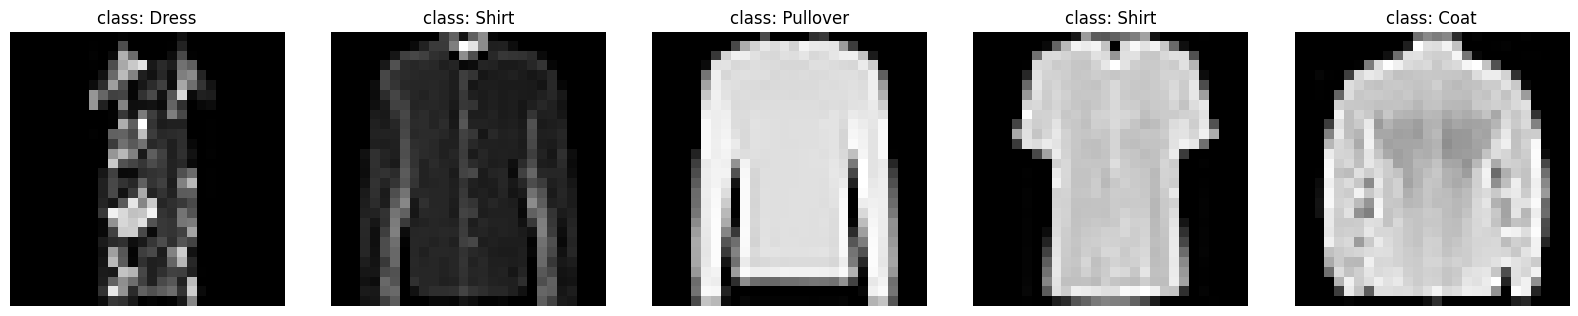

Total number of training samples: 50000
Number of images for class T-shirt/top: 5000
Number of images for class Trouser: 5000
Number of images for class Pullover: 5000
Number of images for class Dress: 5000
Number of images for class Coat: 5000
Number of images for class Sandal: 5000
Number of images for class Shirt: 5000
Number of images for class Sneaker: 5000
Number of images for class Bag: 5000
Number of images for class Ankle boot: 5000


In [ ]:
# checking training set
# randomly show some samples and their labels
# TODO: create a FashionMnist dataset for training, set transform to None (0.5 points)
# your code here
# train_set =  #

# Creating the FashionMnist dataset for training with no transformation
train_set = FashionMnist(phase='train', transform=None)

# Display 5 random samples from the training set
num_to_show = 5
idx = np.random.choice(range(len(train_set)), num_to_show, replace=False)  # Randomly pick 5 samples

fig = plt.figure(figsize=(16, 8))

for i in range(len(idx)):
    image, label = train_set[idx[i]]  # Get image and label
    label_name = train_set.label_names[label]  # Get the label name

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title(f'class: {label_name}')  # Show the class label
    ax.axis('off')
    plt.imshow(np.asarray(image), cmap='gray')  # Display the image

plt.show()

# Print the total number of images in the training set and the count per class
print(f'Total number of training samples: {len(train_set)}')
for i in range(10):
    # Count the number of images for each class
    class_count = np.sum(np.array(train_set.labels) == i)
    print(f'Number of images for class {train_set.label_names[i]}: {class_count}')

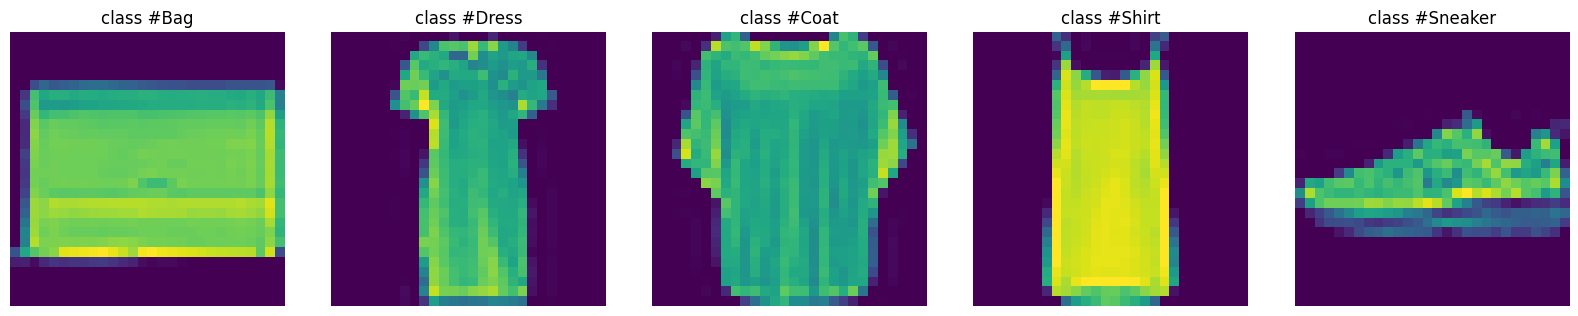

Total number of validation set images: 10000
Number of images for class T-shirt/top: 1000
Number of images for class Trouser: 1000
Number of images for class Pullover: 1000
Number of images for class Dress: 1000
Number of images for class Coat: 1000
Number of images for class Sandal: 1000
Number of images for class Shirt: 1000
Number of images for class Sneaker: 1000
Number of images for class Bag: 1000
Number of images for class Ankle boot: 1000


In [ ]:
# TODO:checking validation data (0.5 points)
# your code here, like the training set, the output in this section should be like this (you can have your own visualization style)
# ------------

# Checking validation set
# Randomly show some samples and their labels
# TODO: create a FashionMnist dataset for validation, set transform to None

valid_set = FashionMnist(phase='valid', transform=None)  # Create validation dataset

# Randomly pick 5 images to show
num_to_show = 5
idx = np.random.choice(range(len(valid_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(16, 8))

# Displaying the selected samples
for i in range(len(idx)):
    image, label = valid_set[idx[i]]  # Get image and label
    label_name = valid_set.label_names[label]  # Get the label name

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))  # Display the label name
    ax.axis('off')
    plt.imshow(np.asarray(image))  # Show the image

plt.show()

# Print the total number of images in the validation set
print('Total number of validation set images: {}'.format(len(valid_set)))

# Print the number of images for each class in the validation set
for i in range(10):
    class_count = np.sum(valid_set.labels == i)  # Count images for each class
    print('Number of images for class {}: {}'.format(valid_set.label_names[i], class_count))

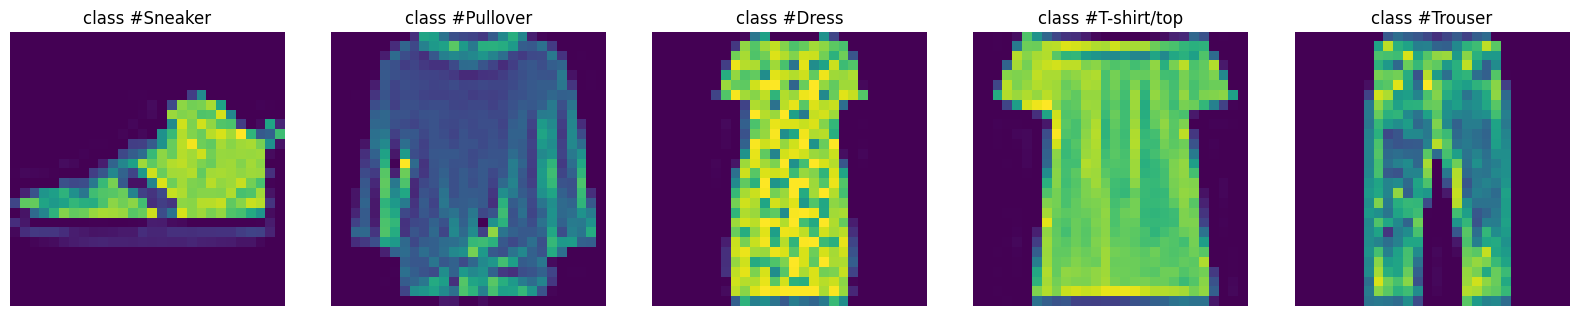

Total number of testing set images: 10000
Number of images for class T-shirt/top: 1000
Number of images for class Trouser: 1000
Number of images for class Pullover: 1000
Number of images for class Dress: 1000
Number of images for class Coat: 1000
Number of images for class Sandal: 1000
Number of images for class Shirt: 1000
Number of images for class Sneaker: 1000
Number of images for class Bag: 1000
Number of images for class Ankle boot: 1000


In [ ]:
# TODO: checking testing data (0.5 points)
# your code here
#---- My Code:
# Checking testing set
# Randomly show some samples and their labels
# TODO: create a FashionMnist dataset for testing, set transform to None

test_set = FashionMnist(phase='test', transform=None)  # Create test dataset

# Randomly pick 5 images to show
num_to_show = 5
idx = np.random.choice(range(len(test_set)), num_to_show, replace=False)

fig = plt.figure(figsize=(16, 8))

# Display the selected samples
for i in range(len(idx)):
    image, label = test_set[idx[i]]  # Get image and label
    label_name = test_set.label_names[label]  # Get the label name

    ax = plt.subplot(1, num_to_show, i + 1)
    plt.tight_layout()
    ax.set_title('class #{}'.format(label_name))  # Display the label name
    ax.axis('off')
    plt.imshow(np.asarray(image))  # Show the image

plt.show()

# Print the total number of images in the testing set
print('Total number of testing set images: {}'.format(len(test_set)))

# Print the number of images for each class in the testing set
for i in range(10):
    class_count = np.sum(test_set.labels == i)  # Count images for each class
    print('Number of images for class {}: {}'.format(test_set.label_names[i], class_count))

### Part 1.3. Iterating through the dataset with batches (<span style="color:green">1 points</span>)
Here, we add more features with the help of [DataLoader](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset):
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

`torch.utils.data.DataLoader` is an iterator which provides all these features. Parameters used below should be clear.

The `DataLoader` takes as input an instance of `FashionMnist` we defined in Part 1.1. Since images in the dataset currently are all in PIL format, we have to convert them to torch.Tensor by using a transform. Actually, `transform` is often used for data augmentation, further illustrations of `transform` can be found in [https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#writing-custom-datasets-dataloaders-and-transforms).

In [ ]:
# Set batch_size to 64, shuffling the training set. Number of workers here is set to 0. If your system is Linux,
# it is possible to try more workers to do multi-process parallel reading.
data_transform = transforms.Compose([transforms.ToTensor()])

train_set = FashionMnist(phase='train', transform=data_transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)

# TODO: create test_loader and valid_loader, both with no shuffling (1 points)
# your code here
# -----
# My Code:
from torch.utils.data import DataLoader
from torchvision import transforms

# Apply transformation to convert images to tensor
data_transform = transforms.Compose([transforms.ToTensor()])

# Creating the training dataset and loader
train_set = FashionMnist(phase='train', transform=data_transform)  # Train dataset
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)  # Train loader

# Creating the validation dataset and loader (no shuffling)
valid_set = FashionMnist(phase='valid', transform=data_transform)  # Validation dataset
valid_loader = DataLoader(valid_set, batch_size=64, shuffle=False, num_workers=0)  # Validation loader

# Creating the test dataset and loader (no shuffling)
test_set = FashionMnist(phase='test', transform=data_transform)  # Test dataset
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)  # Test loader

# Checking the number of batches in the training set
print(f'Number of batches in train_loader: {len(train_loader)}')
print(f'Number of batches in valid_loader: {len(valid_loader)}')
print(f'Number of batches in test_loader: {len(test_loader)}')

# Example: Iterate through the train_loader to fetch a batch and print its size
for images, labels in train_loader:
    print(f'Batch size: {images.size()}')  # Size should be (64, 1, 28, 28)
    break  # Only print the first batch size

Number of batches in train_loader: 782
Number of batches in valid_loader: 157
Number of batches in test_loader: 157
Batch size: torch.Size([64, 1, 28, 28])


## Part 2. Build a CNN on your own (<span style="color:green">2 points</span>)
Structure of the CNN (**Conv**: convolutional layer, **BN**: Batch Normalization layer, **Max_pool**: max pooling layer, **FC**: fully connected layer, batch_size=64):
<!--![model.png](attachment:model.png)-->
<img src=https://raw.githubusercontent.com/marukosan93/DL2024_resources/refs/heads/master/CNN.png width="800">

To define your own Network, following the rule of thumb:
1. Define the layers in `__init__`.
2. Do the forward calculation in `forward`.

In [ ]:
import torch
import torch.nn as nn

class Network(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # TODO: define layers (1 points)
        # your code here

        # Define the layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # Max pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully connected layer (after flattening the feature map)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # 64 channels, 7x7 feature map size after two pooling layers
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
         # TODO: forwards pass (1 points)
        # your code here
        # Forward pass
        x = self.conv1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.pool(x)

        # Flatten the feature map for fully connected layer
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor

        # Fully connected layers
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)

        return x

## Part 3. Train and test your CNN model (<span style="color:green">4 points</span>)
### Part 3.1. Create functions for train and evaluation (<span style="color:green">2.5 points</span>)
* Instantiate a network.
* When training, create an optimizer to take care of network's parameters, calculate the loss and accuracy.
* When evaluating, only the accuracy needs to be calculated

In [ ]:
# instantiate a network
net = Network(num_classes=10)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    for i_batch, (images, labels) in enumerate(data_loader):
        if use_cuda:
            images = images.cuda()
            labels = labels.cuda()
        outs = net(images)
#         _, preds = outs.max(1)
        preds = outs.argmax(dim=1)
        correct += preds.eq(labels).sum()
        num_images += len(labels)

    acc = correct / num_images
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    optimizer =

    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()

    epoches = 10
    for epoch in range(epoches):
        net.train()
        correct = 0.0 # used to accumulate number of correctly recognized images
        num_images = 0.0 # used to accumulate number of images
        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            # TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points),
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)

        acc = correct / num_images
        acc_eval = eval(net, valid_loader)
        print('epoch: %d, lr: %f, accuracy: %f, loss: %f, valid accuracy: %f' % (epoch, optimizer.param_groups[0]['lr'], acc, loss.item(), acc_eval))

    return net

In [ ]:
import torch
import torch.optim as optim

# instantiate a network
net = Network(num_classes=10)

# evaluation function
def eval(net, data_loader):
    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()
    net.eval()
    correct = 0.0
    num_images = 0.0
    with torch.no_grad():  # No gradient calculation during evaluation
        for i_batch, (images, labels) in enumerate(data_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()
            outs = net(images)
            preds = outs.argmax(dim=1)  # Get the index of the max log-probability
            correct += preds.eq(labels).sum().item()
            num_images += len(labels)

    acc = correct / num_images  # Calculate accuracy
    return acc

# training function
def train(net, train_loader, valid_loader):
    loss_function = torch.nn.CrossEntropyLoss()
    # TODO: build your SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay (0.5 points)
    # your code here
    #My Code:

    # Building SGD optimizer with learning rate=0.01, momentum=0.9, no weight decay
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

    use_cuda = torch.cuda.is_available()
    if use_cuda:
        net = net.cuda()

    epoches = 10
    for epoch in range(epoches):
        net.train()  # Set model to training mode
        correct = 0.0  # Used to accumulate number of correctly recognized images
        num_images = 0.0  # Used to accumulate number of images
        running_loss = 0.0  # Used to accumulate loss

        for i_batch, (images, labels) in enumerate(train_loader):
            if use_cuda:
                images = images.cuda()
                labels = labels.cuda()

# TODO: rest of the training code
            # your code here, including the forward propagation (0.75 points),
            # backward propagation (0.75 points) and calculating the accuracy (0.5 points)

#My Code:
            # Forward propagation
            optimizer.zero_grad()  # Zero the gradients before each backward pass
            outs = net(images)  # Get the model's output

            # Calculate the loss
            loss = loss_function(outs, labels)

            # Backward propagation
            loss.backward()  # Compute the gradients
            optimizer.step()  # Update the model's weights

            # Track accuracy
            preds = outs.argmax(dim=1)  # Get predicted class labels
            correct += preds.eq(labels).sum().item()  # Count correct predictions
            num_images += len(labels)  # Count total images

            running_loss += loss.item()  # Accumulate loss

        acc = correct / num_images  # Calculate training accuracy
        acc_eval = eval(net, valid_loader)  # Get validation accuracy
        avg_loss = running_loss / len(train_loader)  # Average loss per batch

        # Print the progress
        print(f"Epoch: {epoch + 1}, "
              f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}, "
              f"Training Accuracy: {acc:.4f}, "
              f"Loss: {avg_loss:.4f}, "
              f"Validation Accuracy: {acc_eval:.4f}")

    return net

### Part 3.2. Train and test your network (<span style="color:green">1.5 points</span>)

In [ ]:
print('Please wait patiently, it may take some seconds...')

# TODO: Train your network here (0.75 points)
# Using the previously defined `train` function to train the network
net_trained = train(net, train_loader, valid_loader)  # Train the network using the training and validation loaders

# TODO: Test your network here on testing data (0.75 points)
# Using the `eval` function to evaluate the trained model on the test set
acc_test = eval(net_trained, test_loader)  # Evaluate the model on the test set

# Print the accuracy on testing data
print('accuracy on testing data: %f' % acc_test)

Please wait patiently, it may take some seconds...
Epoch: 1, Learning Rate: 0.010000, Training Accuracy: 0.8459, Loss: 0.4235, Validation Accuracy: 0.8804
Epoch: 2, Learning Rate: 0.010000, Training Accuracy: 0.8974, Loss: 0.2833, Validation Accuracy: 0.8920
Epoch: 3, Learning Rate: 0.010000, Training Accuracy: 0.9114, Loss: 0.2380, Validation Accuracy: 0.8957
Epoch: 4, Learning Rate: 0.010000, Training Accuracy: 0.9229, Loss: 0.2072, Validation Accuracy: 0.9075
Epoch: 5, Learning Rate: 0.010000, Training Accuracy: 0.9314, Loss: 0.1841, Validation Accuracy: 0.9092
Epoch: 6, Learning Rate: 0.010000, Training Accuracy: 0.9374, Loss: 0.1672, Validation Accuracy: 0.9184
Epoch: 7, Learning Rate: 0.010000, Training Accuracy: 0.9454, Loss: 0.1463, Validation Accuracy: 0.9125
Epoch: 8, Learning Rate: 0.010000, Training Accuracy: 0.9513, Loss: 0.1307, Validation Accuracy: 0.9150
Epoch: 9, Learning Rate: 0.010000, Training Accuracy: 0.9574, Loss: 0.1143, Validation Accuracy: 0.9136
Epoch: 10, Le